#Data Preprocessing

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 26.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from rdkit import DataStructs
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import AffinityPropagation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/2022-2023 Research Club/description_df.pkl")
df

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation,description,numSentences
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.240,C9H17NO4,66.4,214.0,0.4,14,0,...,Acetylcarnitine,Classification|Drug and Medication Information...,9,NaN,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,D002491 - Central Nervous System Agents > D018...,An acetic acid ester of CARNITINE that facilit...,8
1,3,"5,6-Dihydroxycyclohexa-1,3-diene-1-carboxylic ...","5,6-dihydroxycyclohexa-1,3-diene-1-carboxylic ...",156.140,C7H8O4,77.8,229.0,-0.3,11,3,...,NaN,Classification|Literature|Patents,5,NaN,20040916,AAA Chemistry|ABI Chem|Achemica|BenchChem|ChEB...,Chemical Vendors|Curation Efforts|Governmental...,NaN,"2,3-dihydroxy-2,3-dihydrobenzoic acid is a cyc...",5
2,4,1-Aminopropan-2-ol,1-Aminopropan-2-ol|1-AMINO-2-PROPANOL|78-96-6|...,75.110,C3H9NO,46.2,22.9,-1.0,5,2,...,NaN,Biological Test Results|Chemical and Physical ...,14,155|157|161|165|167|175|1188|23443|158688|6516...,20050326,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,NaN,Monoisopropanolamine appears as a colorless li...,13
3,5,3-Amino-2-oxopropyl phosphate,3-Amino-2-oxopropyl phosphate|3-amino-2-oxopro...,169.070,C3H8NO5P,110.0,162.0,-5.0,10,3,...,NaN,Classification|Literature|Patents,5,NaN,20050601,AAA Chemistry|ABI Chem|BenchChem|BIND|BioCyc|C...,Chemical Vendors|Curation Efforts|Governmental...,NaN,3-Amino-2-oxopropyl phosphate is a metabolite ...,4
4,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.550,C6H3ClN2O4,91.6,224.0,2.3,13,0,...,Dinitrochlorobenzene,Biological Test Results|Chemical and Physical ...,14,155|157|161|165|167|175|179|192|220|300|302|11...,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,C308 - Immunotherapeutic Agent > C2139 - Immun...,Dinitrochlorobenzene is an aromatic hydrocarbo...,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328390,168266256,CID 168266256,9002-62-4,3417.600,C160H194N22O54S4,1130.0,5660.0,NaN,240,4,...,Prolactin,NaN,0,NaN,20230605,"Cooke Chemical Co., Ltd",Chemical Vendors,NaN,A lactogenic hormone secreted by the adenohypo...,5
328391,168266268,CID 168266268,8002-50-4,2867.500,C147H151Cl8N27O18,469.0,4770.0,NaN,200,4,...,NaN,NaN,0,NaN,20230605,"Cooke Chemical Co., Ltd",Chemical Vendors,NaN,"Oils, edible: fish is a pale yellow oily liqui...",4
328392,168266335,CID 168266335,CID 162451877|64475-85-0,13508.655,Tb85,0.0,0.0,NaN,85,0,...,NaN,NaN,0,NaN,20230605,"Cooke Chemical Co., Ltd",Chemical Vendors,NaN,Turpentine substitute appears as a clear color...,4
328393,168266352,CID 168266352,CID 162301785|25038-44-2|68551-12-2,632.300,C26H30B2N10O4S2,225.0,427.0,NaN,44,2,...,NaN,NaN,0,NaN,20230605,"Cooke Chemical Co., Ltd",Chemical Vendors,NaN,Alcohol c-12 c-16 poly (1-6) ethoxylate appear...,10


In [ ]:
smiles_data = df["isosmiles"].tolist()[:2000]
smiles_data

['CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C',
 'C1=CC(C(C(=C1)C(=O)O)O)O',
 'CC(CN)O',
 'C(C(=O)COP(=O)(O)O)N',
 'C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl',
 'CCC(C)(C(C(=O)O)O)O',
 'C1(C(C(C(C(C1O)O)OP(=O)(O)O)O)O)O',
 'C(CCl)Cl',
 'C1=C(C=C(C(=C1O)O)O)O',
 'C1=CC(=C(C=C1Cl)Cl)Cl',
 'CCCCCC(=O)C=CC1C(CC(=O)C1CCCCCCC(=O)O)O',
 'CC12CCC(=O)CC1CCC3C2CCC4(C3CCC4O)C',
 'C1CCC(=O)NCCCCCC(=O)NCC1',
 'C1C=CC(=NC1C(=O)O)C(=O)O',
 'C(C(C(C(=O)C(=O)C(=O)O)O)O)O',
 'C1=CC(=C(C(=C1)O)O)C(=O)O',
 'C1=CC(=C(C(=C1)O)O)CCC(=O)O',
 'CCC(C(=O)C)(C(=O)O)O',
 'CC(=O)C(C)(C(=O)O)O',
 'C(=CC(=C(C(=O)O)N)C(=O)O)C=O',
 'C(=CC(=O)O)C=C(C(=O)O)N',
 'C(=O)C(C(=O)O)N',
 'C(=CC=O)C=C(C(=O)O)N',
 'CC(CO)(C(COP(=O)(O)O)O)O',
 'C(C=O)Cl',
 'C(CCl)O',
 'C1=CC(OC1=O)(CC(=O)O)Cl',
 'CC(C)C(C(C(=O)O)O)C(=O)O',
 'CC(C)(CO)C(=O)C(=O)O',
 'CC1(COC(=O)C1=O)C',
 'C1C(C(C(OC1O)CO)O)O',
 'C(CC(=O)O)C(C(=O)O)O',
 'C(C(=O)[O-])(C(=O)[O-])O',
 'C(C(=O)O)(C(=O)O)O',
 'CCC(C)C(=O)C(=O)O',
 'C(CC(=O)N)C(=O)C(=O)O',
 'CC(C)C(=O)C(=O)O',
 'C(C

#Model 1 Creation with MACCS Fingerprinting

In [ ]:
def affinity_propagation(X, damping=0.8):

    affinity_prop = AffinityPropagation(damping=damping)
    cluster_centers_indices = affinity_prop.fit_predict(X)

    clusters_data = [X[cluster_centers_indices == i] for i in np.unique(cluster_centers_indices)]

    return cluster_centers_indices, clusters_data

def mahalanobis_distance(query_point, clusters, covariances):
    distances = []
    for cluster_data, covariance in zip(clusters, covariances):
        inv_covariance = np.linalg.inv(covariance)
        distance = mahalanobis(query_point, trim_mean(cluster_data, proportiontocut=0.1, axis=0), inv_covariance)
        distances.append(distance)
    return distances

def compute_covariance_matrix(cluster_data):
    if cluster_data.shape[0] > 1:
        return np.cov(cluster_data, rowvar=False)
    else:
        num_features = cluster_data.shape[1]
        return np.eye(num_features)

def plot_clusters(X, cluster_centers_indices, clusters_data, query_point, ranked_cluster_indices):
    num_clusters = len(np.unique(cluster_centers_indices))
    cmap = plt.get_cmap('tab20', num_clusters)

    plt.figure(figsize=(24, 24))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_centers_indices, cmap=cmap, s=70, alpha=0.7, edgecolors='k')
    plt.scatter(query_point[0], query_point[1], marker='D', color='red', s=100, label='Query Point')

    for rank, cluster_index in enumerate(ranked_cluster_indices):
        cluster_center = trim_mean(clusters_data[cluster_index], proportiontocut=0.1, axis=0)
        plt.scatter(cluster_center[0], cluster_center[1], marker='o', s=150, label=f'Cluster {cluster_index + 1}')
        plt.annotate(f"Cluster {cluster_index + 1}\nDistance: {distances[cluster_index]:.4f}",
                     xy=(cluster_center[0], cluster_center[1]),
                     xytext=(15, -25 - rank * 35),
                     textcoords="offset points",
                     ha='center',
                     va='center',
                     fontsize=12,
                     color='black',
                     bbox=dict(boxstyle="round,pad=0.4", edgecolor='black', facecolor='white', alpha=0.8))

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)
    plt.title("Affinity Propagation Clustering with Winsorized Mean", fontsize=16)
    plt.xlabel("Dimension 1 (Z-score normalized)", fontsize=14)
    plt.ylabel("Dimension 2 (Z-score normalized)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return num_clusters

def compute_tanimoto_distances(X, smiles_strings):
    num_samples = X.shape[0]
    distances = np.zeros((num_samples, num_samples))

    mols = [AllChem.MolFromSmiles(smiles) for smiles in smiles_strings]

    for i in range(num_samples):
        for j in range(i + 1, num_samples):
            bv1 = AllChem.GetMACCSKeysFingerprint(mols[i])
            bv2 = AllChem.GetMACCSKeysFingerprint(mols[j])

            distance = 1.0 - DataStructs.TanimotoSimilarity(bv1, bv2)
            distances[i, j] = distance
            distances[j, i] = distance

    return distances

In [ ]:
if __name__ == "__main__":

    encoder = OneHotEncoder(sparse=False, dtype=int)
    smiles_tokens = [list(smiles) for smiles in smiles_data]
    smiles_strings = [''.join(tokens) for tokens in smiles_tokens]
    smiles_strings_reshaped = np.array(smiles_strings).reshape(-1, 1)
    one_hot_encoded = encoder.fit_transform(smiles_strings_reshaped)

    n_dimensions = 2
    perplexity = 31


    tanimoto_distances = compute_tanimoto_distances(one_hot_encoded, smiles_strings)


    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(tanimoto_distances)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    np.random.seed(42)
    X = z_score_normalized_data

    cluster_centers_indices, clusters_data = affinity_propagation(X, damping=0.8)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
[21:41:31] WARNING: not removing hydrogen atom without neighbors
[21:41:32] WARNING: not removing hydrogen atom without neighbors


Mean of z-score normalized data: [-1.17748975e-07 -7.91549652e-08]
Standard deviation of z-score normalized data: [1.0000004 1.0000001]


In [ ]:
    num_clusters = plot_clusters(X, cluster_centers_indices, clusters_data, None, None)

    print("Number of Clusters:", num_clusters)

In [ ]:
   if not clusters_data:
        print("Clustering failed to converge.")
    else:
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in clusters_data]

        query_point_z_score_normalized = np.array([0.7, 1.9])  # Replace with actual Z-score normalized query point.

        distances = mahalanobis_distance(query_point_z_score_normalized, clusters_data, covariances)

        ranked_cluster_indices = np.argsort(distances)

        num_clusters = plot_clusters(X, cluster_centers_indices, clusters_data, query_point_z_score_normalized, ranked_cluster_indices)

        closest_cluster_index = ranked_cluster_indices[0]

        closest_cluster_data = clusters_data[closest_cluster_index]

        closest_cluster_smiles_indices = np.where(cluster_centers_indices == closest_cluster_index)[0]

        closest_cluster_smiles = [smiles_data[idx] for idx in closest_cluster_smiles_indices]

        closest_cluster = []

        print("\nOriginal Smiles in Closest Cluster:")
        for smiles in closest_cluster_smiles:
            closest_cluster.append(smiles)
            print(smiles + "\n" + "\n" + "\n" + "\n")

        cmap = plt.get_cmap('tab20', num_clusters)
        plt.figure(figsize=(15, 15))
        plt.scatter(closest_cluster_data[:, 0], closest_cluster_data[:, 1], c=cmap(closest_cluster_index),
                    s=70, alpha=0.7, edgecolors='k')
        plt.scatter(query_point_z_score_normalized[0], query_point_z_score_normalized[1], marker='D', color='red', s=100,
                    label='Query Point')
        plt.scatter(trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[0],
                    trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[1], marker='o', s=150,
                    label=f'Cluster {closest_cluster_index + 1}')
        plt.plot([query_point_z_score_normalized[0], trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[0]],
                [query_point_z_score_normalized[1], trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[1]],
                color='gray', linestyle='--')
        plt.title("Closest Cluster Visualization with Line", fontsize=16)
        plt.xlabel("Dimension 1 (Z-score normalized)", fontsize=14)
        plt.ylabel("Dimension 2 (Z-score normalized)", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

In [ ]:
closest_cluster

['C1=CC(C(C(=C1)C(=O)O)O)O',
 'C1=CC(=C(C(=C1)O)O)CCC(=O)O',
 'C1=CC(OC1=O)(CC(=O)O)Cl',
 'CC1(COC(=O)C1=O)C',
 'C1C(C(C(OC1O)CO)O)O',
 'C1C(C(C(=O)C=C1C(=O)O)O)O',
 'C1=CC(=CC(=C1)O)CCC(=O)O',
 'C1C=C(OC1=O)CC(=O)O',
 'C1=CC(=CC=C1CC(=O)O)O',
 'C(C1C(C(C(C(O1)O)O)O)O)O',
 'C1C(C(C(C(O1)O)O)O)O',
 'C(C1C(C(C(C(O1)OC2C(OC(C(C2O)O)O)CO)O)O)O)O',
 'C=C(C(=O)O)OC1C=C(C=CC1O)C(=O)O',
 'C1=CC(=CC=C1O)OC2C(C(C(C(O2)CO)O)O)O',
 'C(C1C(C(=O)C(C(O1)O)O)O)O',
 'C1C(CC(=O)C=C1O)O',
 'C1=CC(=O)OC1CC(=O)O',
 'C1=CC(OC1=O)(CC(=O)O)C(=O)O',
 'C1=CC(=C(C=C1CC(=O)O)O)O',
 'C(C(C1C(C(C(=O)O1)O)O)O)O',
 'C1C(C(C(=O)CC1(C(=O)O)O)O)O',
 'C1=CC=C(C=C1)C=C(C(=O)O)O',
 'C(C1C(C(C(O1)(CO)O)O)O)O',
 'C(C1C(C(C(C(=O)O1)O)O)O)O',
 'C1=CC(=C(C=C1O)CC(=O)O)O',
 'C(C(C1C(=O)C(=O)C(=O)O1)O)O',
 'C(C1C(C(C(C(O1)OC2C(OC(C(C2O)O)OC3C(OC(C(C3O)O)OC4C(OC(C(C4O)O)O)CO)CO)CO)O)O)O)O',
 'C(C1C(C(C(C(O1)OC2C(OC(C(C2O)O)OC3C(OC(C(C3O)O)O)CO)CO)O)O)O)O',
 'C(C1C(C(C(C(O1)OCC2C(C(C(C(O2)O)O)O)O)O)O)O)O',
 'C1=CC=C(C(=C1)CCC(=O)O)

#Tanimoto Accuracy Calculation

In [ ]:
#MACCS
from rdkit import Chem
from rdkit.Chem import MACCSkeys

def calculate_tanimoto_coefficient(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    if mol1 is None or mol2 is None:
        raise ValueError("Invalid SMILES string provided.")

    maccs1 = MACCSkeys.GenMACCSKeys(mol1)
    maccs2 = MACCSkeys.GenMACCSKeys(mol2)

    common_bits = maccs1 & maccs2
    all_bits = maccs1 | maccs2
    tanimoto_coefficient = sum(common_bits) / sum(all_bits)

    return tanimoto_coefficient

def calculate_tanimoto_coefficients_for_first(smiles_list):
    if len(smiles_list) < 2:
        raise ValueError("List must contain at least two SMILES strings.")

    reference_smiles = smiles_list[0] #Testing Against the Whole cluster
    print("Reference molecule SMILES:", reference_smiles)

    tanimoto_coefficients = []

    for idx, smiles in enumerate(smiles_list[1:], start=1):
        tanimoto_coefficient = calculate_tanimoto_coefficient(reference_smiles, smiles)
        print(f"Tanimoto Coefficient with molecule {idx}: {tanimoto_coefficient:.4f}")
        tanimoto_coefficients.append(tanimoto_coefficient)

    return tanimoto_coefficients

smiles_list = closest_cluster
coefficients_list = calculate_tanimoto_coefficients_for_first(smiles_list)
print("Tanimoto Coefficients List:", coefficients_list)

Reference molecule SMILES: C1=CC(C(C(=C1)C(=O)O)O)O
Tanimoto Coefficient with molecule 1: 0.5312
Tanimoto Coefficient with molecule 2: 0.4000
Tanimoto Coefficient with molecule 3: 0.3714
Tanimoto Coefficient with molecule 4: 0.5294
Tanimoto Coefficient with molecule 5: 0.8077
Tanimoto Coefficient with molecule 6: 0.4194
Tanimoto Coefficient with molecule 7: 0.4688
Tanimoto Coefficient with molecule 8: 0.4815
Tanimoto Coefficient with molecule 9: 0.5625
Tanimoto Coefficient with molecule 10: 0.5806
Tanimoto Coefficient with molecule 11: 0.5000
Tanimoto Coefficient with molecule 12: 0.7600
Tanimoto Coefficient with molecule 13: 0.5000
Tanimoto Coefficient with molecule 14: 0.5938
Tanimoto Coefficient with molecule 15: 0.6154
Tanimoto Coefficient with molecule 16: 0.4667
Tanimoto Coefficient with molecule 17: 0.4848
Tanimoto Coefficient with molecule 18: 0.5862
Tanimoto Coefficient with molecule 19: 0.5455
Tanimoto Coefficient with molecule 20: 0.6333
Tanimoto Coefficient with molecule 21

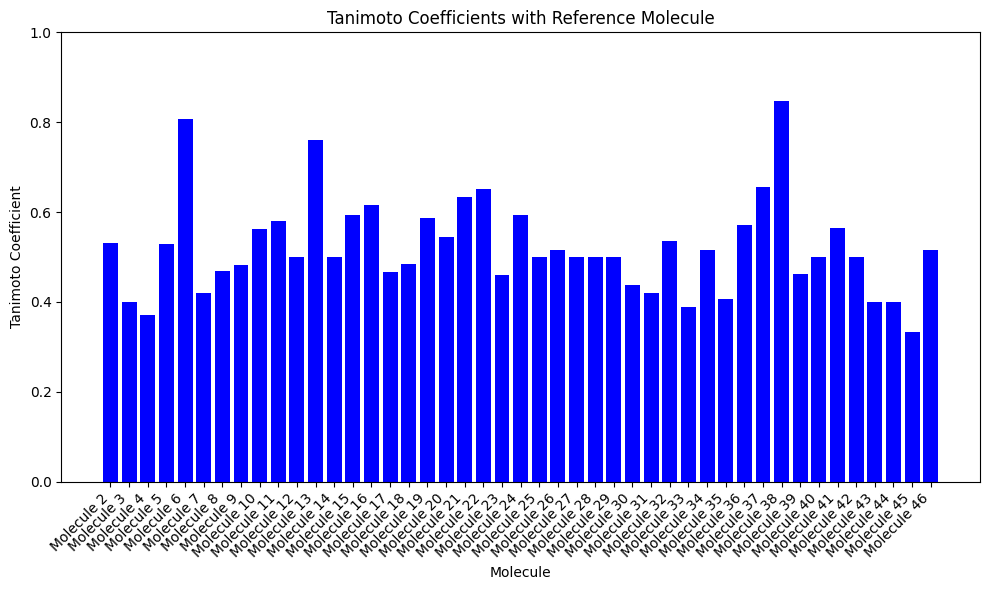

In [ ]:
#Visualization
import matplotlib.pyplot as plt
import numpy as np

def visualize_tanimoto_coefficients(smiles_list, tanimoto_coefficients):
    x_labels = [f"Molecule {i}" for i in range(2, len(smiles_list) + 1)]
    y_values = tanimoto_coefficients

    plt.figure(figsize=(10, 6))
    plt.bar(x_labels, y_values, color='blue')
    plt.xlabel('Molecule')
    plt.ylabel('Tanimoto Coefficient')
    plt.title('Tanimoto Coefficients with Reference Molecule')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


smiles_list = closest_cluster
tanimoto_coefficients = coefficients_list

visualize_tanimoto_coefficients(smiles_list, tanimoto_coefficients)


#Summary Statistics for Tanimoto Accuracy Set

Summary Statistics:
Data: [0.53125, 0.4, 0.37142857142857144, 0.5294117647058824, 0.8076923076923077, 0.41935483870967744, 0.46875, 0.48148148148148145, 0.5625, 0.5806451612903226, 0.5, 0.76, 0.5, 0.59375, 0.6153846153846154, 0.4666666666666667, 0.48484848484848486, 0.5862068965517241, 0.5454545454545454, 0.6333333333333333, 0.6521739130434783, 0.4594594594594595, 0.59375, 0.5, 0.5151515151515151, 0.5, 0.5, 0.5, 0.4375, 0.41935483870967744, 0.5357142857142857, 0.3888888888888889, 0.5151515151515151, 0.4074074074074074, 0.5714285714285714, 0.6551724137931034, 0.8461538461538461, 0.46153846153846156, 0.5, 0.5652173913043478, 0.5, 0.4, 0.4, 0.3333333333333333, 0.5161290322580645]
Mean: 0.5224818564640792
Median: 0.5
Standard Deviation: 0.10606924304150361
Variance: 0.011250684319397563
Minimum Value: 0.3333333333333333
Maximum Value: 0.8461538461538461
Range: 0.5128205128205128
Count: 45


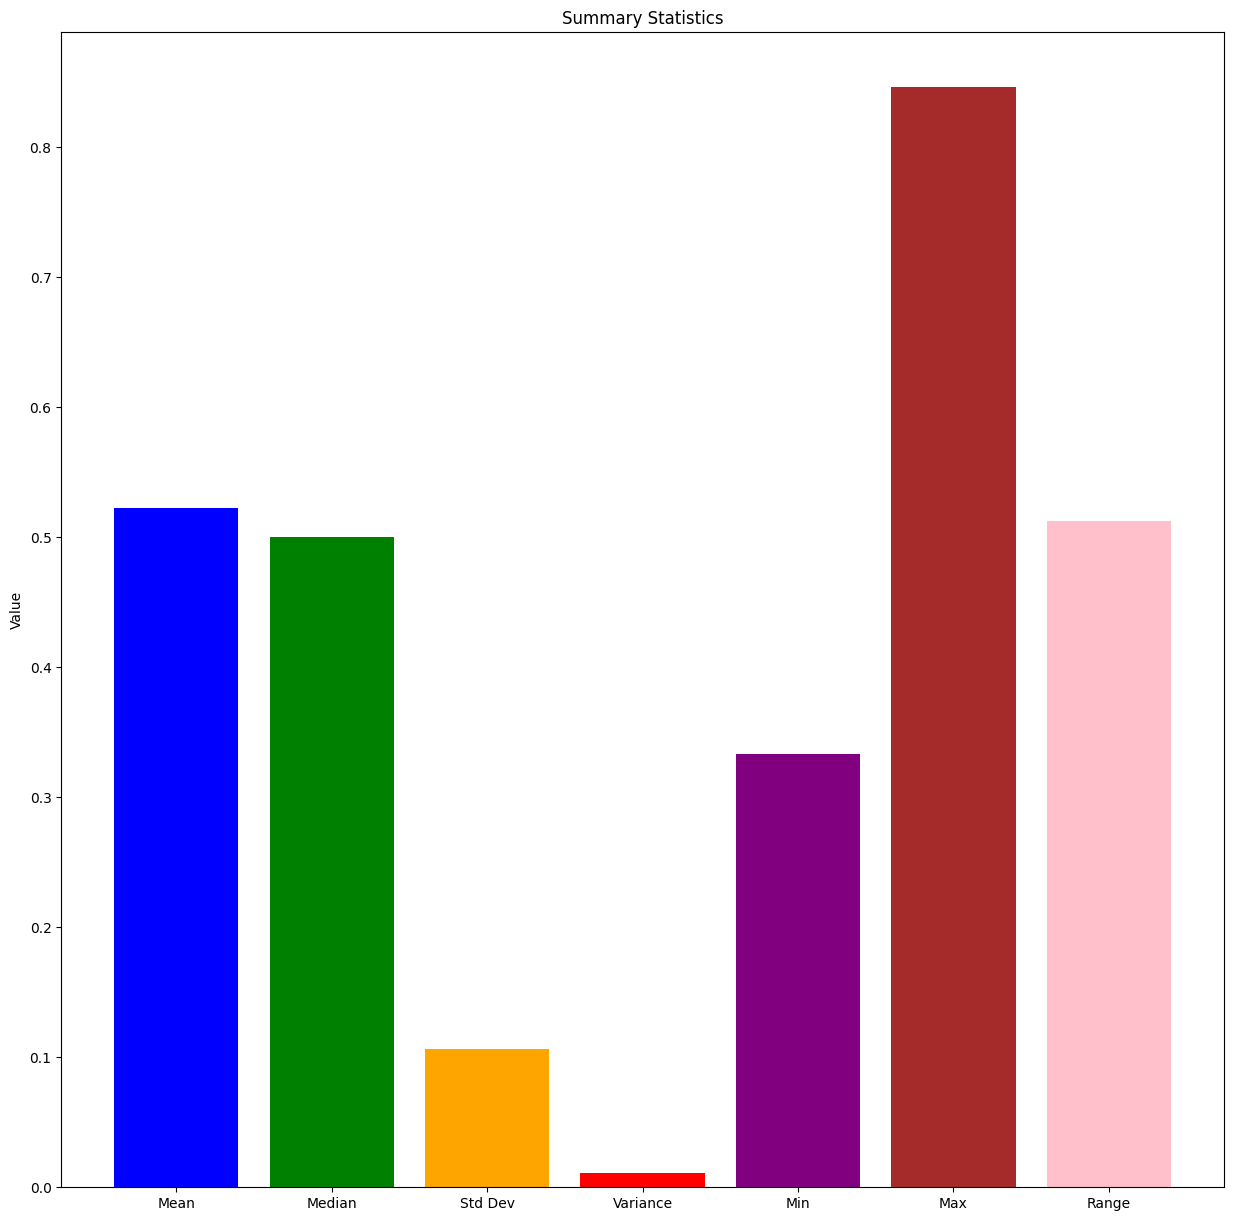

In [ ]:
data = coefficients_list

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()